/tmp/ipython-input-2-536024024.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='predicted_sentiment', palette='Set2')


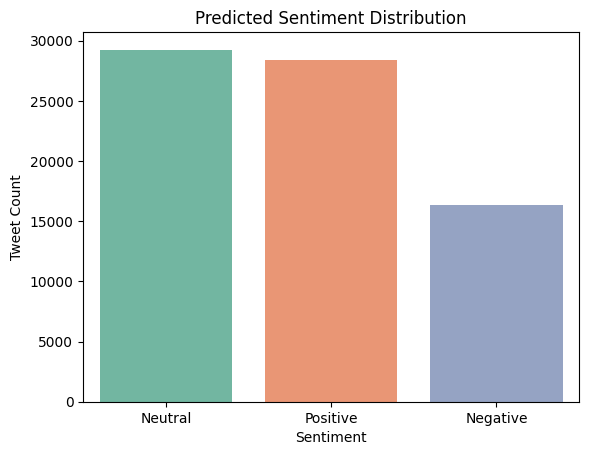

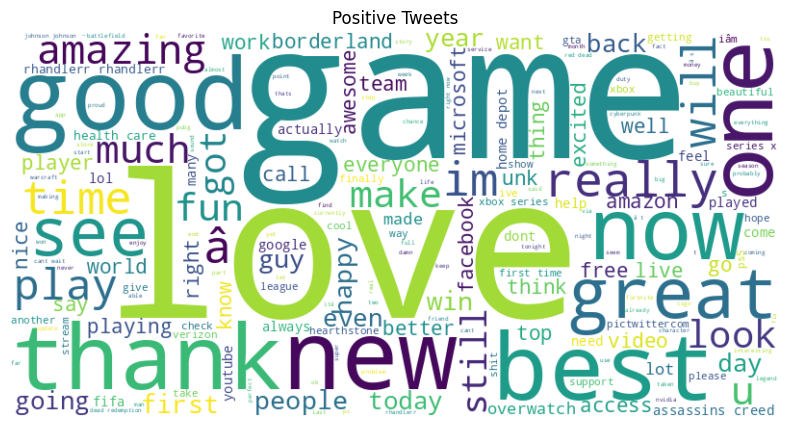

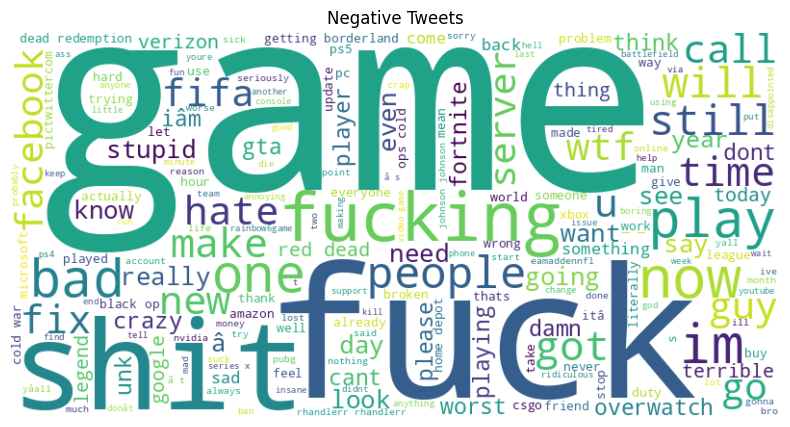

In [2]:

!pip install textblob wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from textblob import TextBlob


df = pd.read_csv('/content/twitter.csv', encoding='ISO-8859-1', header=None)


df.columns = ['id', 'topic', 'sentiment', 'tweet']

# Displaying the first few rows
df.head()

# Droping rows where tweet text is missing
df = df.dropna(subset=['tweet'])

# Clean text
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = text.lower().strip()          # lowercase and remove extra spaces
    return text

df['clean_tweet'] = df['tweet'].apply(clean_tweet)
df[['tweet', 'clean_tweet']].head()



def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_tweet'].apply(get_polarity)

# Classify the sentimenf scores
def get_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['predicted_sentiment'] = df['polarity'].apply(get_sentiment)

# View results
df[['clean_tweet', 'polarity', 'predicted_sentiment']].head()

sns.countplot(data=df, x='predicted_sentiment', palette='Set2')
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

def show_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# WordCloud for positive tweets
show_wordcloud(df[df['predicted_sentiment']=='Positive']['clean_tweet'], 'Positive Tweets')

# WordCloud for negative tweets
show_wordcloud(df[df['predicted_sentiment']=='Negative']['clean_tweet'], 'Negative Tweets')
